## TIME SERIES ANALYSIS of S&P 500 Index

In [1]:
# Importing all the required lib
import os  
import numpy as np  
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sb  
sb.set_style('darkgrid')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
index=pd.read_csv('index.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [3]:
index.shape

(1511, 1)

In [4]:
index.head()

,Price
Date,
2015-01-02,2058.20
2015-01-05,2020.58
2015-01-06,2002.61
2015-01-07,2025.90
2015-01-08,2062.14


In [5]:
index.tail()

,Price
Date,
2020-12-24,3703.06
2020-12-28,3735.36
2020-12-29,3727.04
2020-12-30,3732.04
2020-12-31,3756.07


In [6]:
index.describe()

,Price
count,1511.000000
mean,2580.770113
std,452.827241
min,1829.080000
25%,2125.030000
50%,2584.960000
75%,2888.460000
max,3756.070000


In [7]:
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-01-02 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1511 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


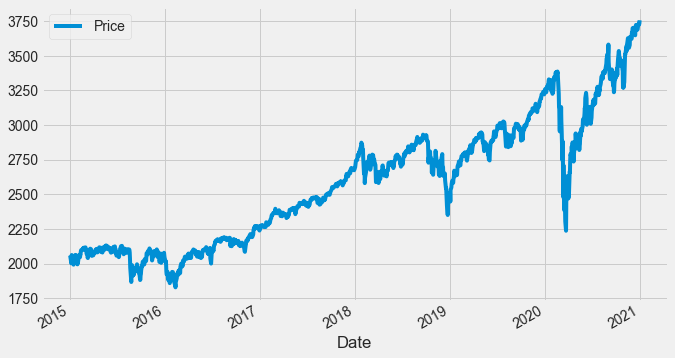

In [8]:
#plot the data
index.plot()
plt.show()

(array([101., 386., 121., 158., 233., 239., 100.,  89.,  50.,  34.]),
 array([1829.08 , 2021.779, 2214.478, 2407.177, 2599.876, 2792.575,
        2985.274, 3177.973, 3370.672, 3563.371, 3756.07 ]),
 <a list of 10 Patch objects>)

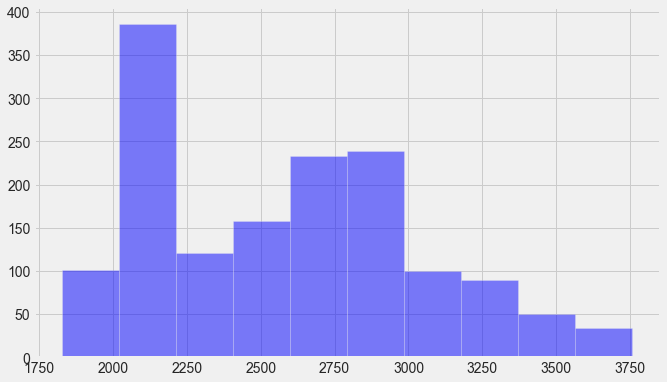

In [9]:
num_bins=10
plt.hist(index['Price'], num_bins, facecolor='blue', alpha=0.5)

#moving average method

In [14]:
df=pd.read_csv('index.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [15]:
df_train = df.iloc[0:1208]
df_test = df.iloc[1208:]

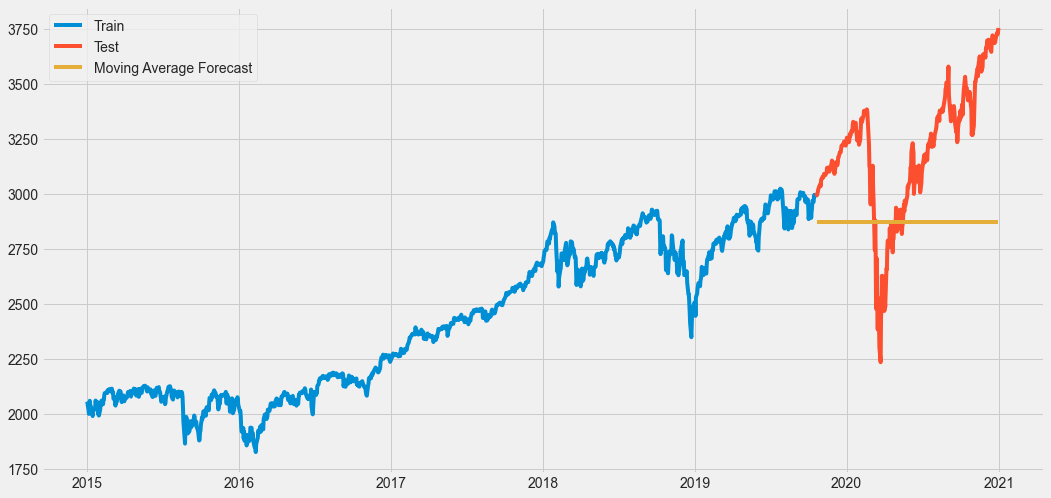

In [16]:
y_hat_avg = df_test.copy()
y_hat_avg['moving_avg_forecast'] = df_train['Price'].rolling(195).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(df_train['Price'], label='Train')
plt.plot(df_test['Price'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [17]:
rms = sqrt(mean_squared_error(df_test.Price, y_hat_avg.moving_avg_forecast))
print(rms)

440.94628472625243


In [117]:
# weighted moving average

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [119]:
plt.style.use('fivethirtyeight')

In [120]:
df = pd.read_csv('index.csv', index_col = 'Date')
df.index = pd.to_datetime(df.index)


In [121]:
df_train = df.iloc[0:1208]
df_test = df.iloc[1208:]


In [122]:
#To calculate a 10-Day WMA, we start by creating an array of weights - whole numbers from 1 to 10:
weights = np.arange(1,11) #this creates an array with integers 1 to 10 included
weights


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [123]:
#compute the dot product of weights and prices in our rolling window (prices in the window will be multiplied by the corresponding weight, then summed), 
#then dividing it by the sum of the weights:
wma10 = df_train['Price'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
wma10


Date
2015-01-02            NaN
2015-01-05            NaN
2015-01-06            NaN
2015-01-07            NaN
2015-01-08            NaN
                 ...     
2019-10-14    2938.954182
2019-10-15    2950.599636
2019-10-16    2960.148182
2019-10-17    2969.342545
2019-10-18    2974.812909
Name: Price, Length: 1208, dtype: float64

In [124]:
#Creating a new column for WMA
df['WMA'] = wma10


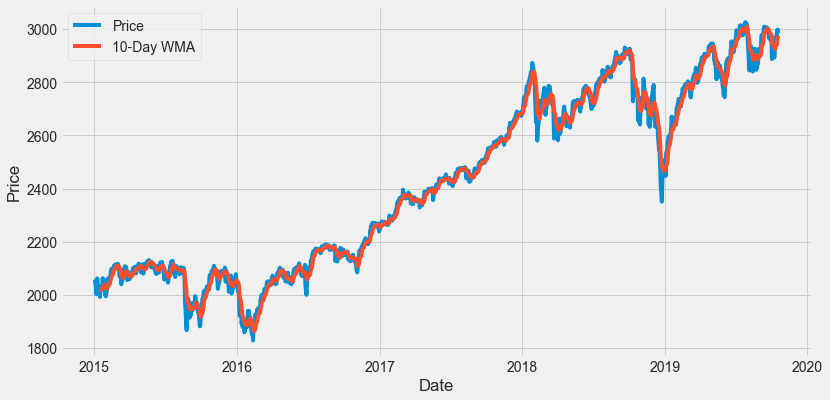

In [125]:
#Plotting WMA( period =10) with Price 
plt.figure(figsize = (12,6))
plt.plot(df_train['Price'], label="Price")
plt.plot(wma10, label="10-Day WMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [126]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import math
from math import sqrt


In [128]:
df_train = df.iloc[0:1208]
df_test = df.iloc[1208:]


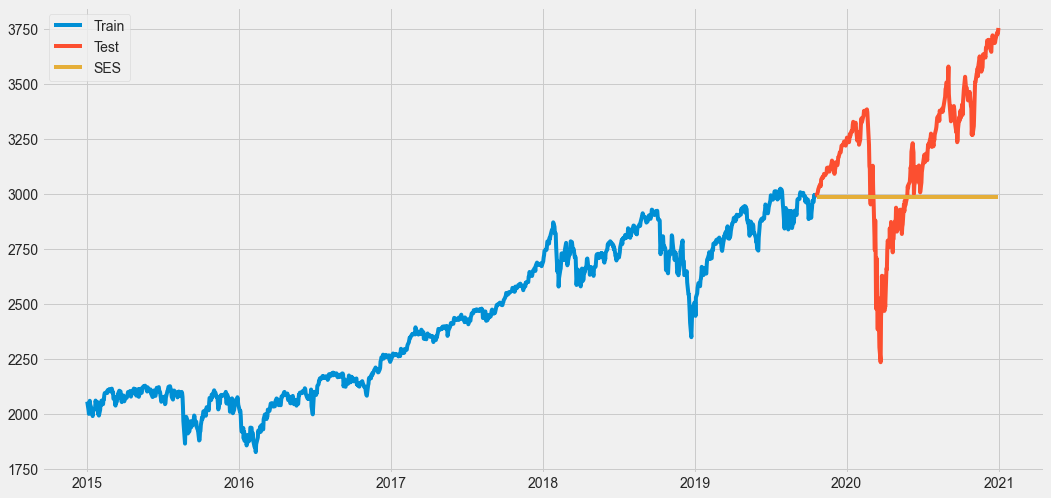

In [129]:
y_hat_avg = df_test.copy()
fit2 = SimpleExpSmoothing(np.asarray(df_train['Price'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(df_test))
plt.figure(figsize=(16,8))
plt.plot(df_train['Price'], label='Train')
plt.plot(df_test['Price'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [130]:
rms = sqrt(mean_squared_error(df_test.Price, y_hat_avg.SES))
print('RMSE:', rms)


RMSE: 363.33279254160925


## Holts winter method

In [131]:
df4 = pd.read_csv('index.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [132]:
df4.head()

,Price
Date,
2015-01-02,2058.20
2015-01-05,2020.58
2015-01-06,2002.61
2015-01-07,2025.90
2015-01-08,2062.14


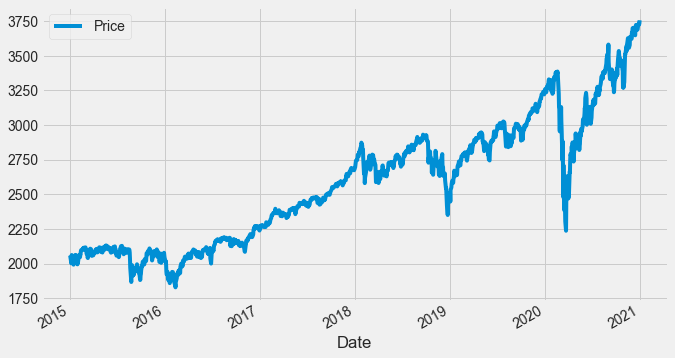

In [133]:
#plot the data
df4.plot()
plt.show()

In [134]:
#split between the training and the test data sets. 
df_train = df4.iloc[0:1208]
df_test = df4.iloc[1208:]

In [135]:
df_train

,Price
Date,
2015-01-02,2058.20
2015-01-05,2020.58
2015-01-06,2002.61
2015-01-07,2025.90
2015-01-08,2062.14
...,...
2019-10-14,2966.15
2019-10-15,2995.68
2019-10-16,2989.69


In [136]:
df_test

,Price
Date,
2019-10-21,3006.72
2019-10-22,2995.99
2019-10-23,3004.52
2019-10-24,3010.29
2019-10-25,3022.55
...,...
2020-12-24,3703.06
2020-12-28,3735.36
2020-12-29,3727.04


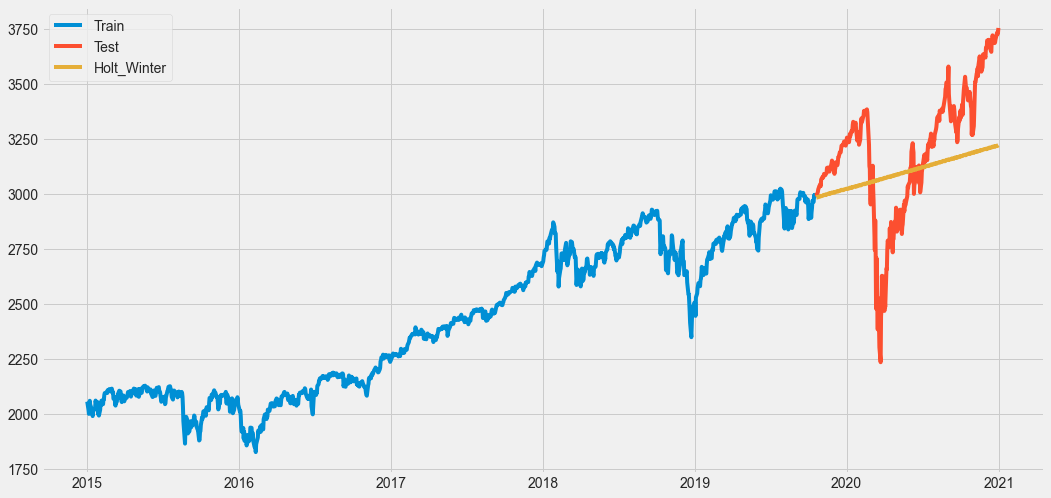

In [137]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = df_test.copy()
fit1 = ExponentialSmoothing(np.asarray(df_train['Price']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(df_test))
plt.figure(figsize=(16,8))
plt.plot( df_train['Price'], label='Train')
plt.plot(df_test['Price'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [138]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(df_test.Price, y_hat_avg.Holt_Winter))
print(rms)



278.50864303635274


In [139]:
##Auto regression model (ARIMA)

In [140]:
## importing all the required libraries

In [141]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [142]:
#index['Price'] = index['Price'].str.replace(',', '').astype(float)

In [143]:
#index = index.sort_index(ascending=False)

In [144]:
#index.to_csv(r'C:\Users\HP\Desktop\python\descision tree\Index.csv',index = False)

In [145]:
index=pd.read_csv('index.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [146]:
index

,Price
Date,
2015-01-02,2058.20
2015-01-05,2020.58
2015-01-06,2002.61
2015-01-07,2025.90
2015-01-08,2062.14
...,...
2020-12-24,3703.06
2020-12-28,3735.36
2020-12-29,3727.04


In [147]:
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-01-02 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1511 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


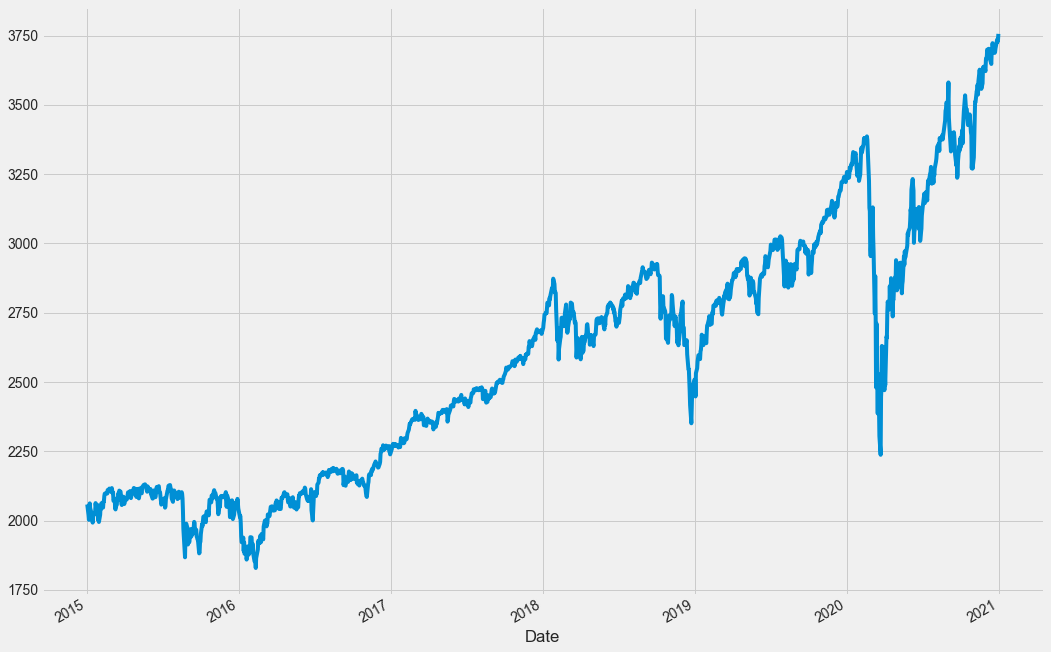

In [148]:
index['Price'].plot(figsize=(16, 12))

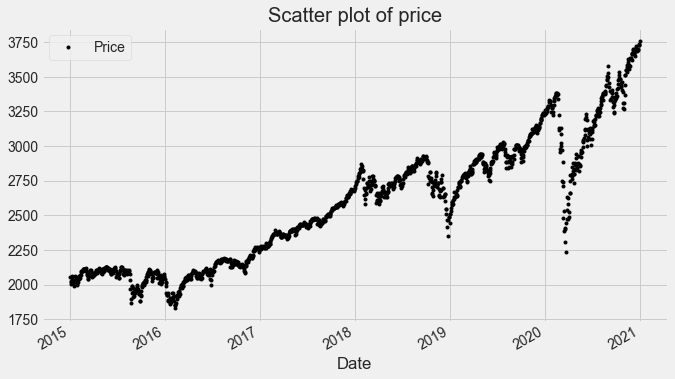

In [149]:
index.plot(style='k.')
plt.title('Scatter plot of price')
plt.show()

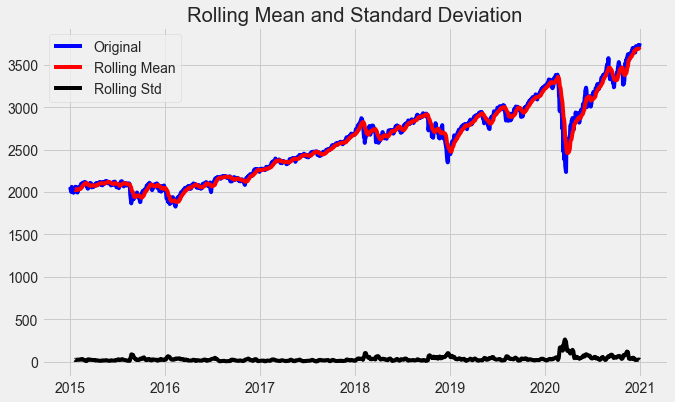

Results of dickey fuller test
Test Statistics                  -0.394109
p-value                           0.911078
No. of lags used                  9.000000
Number of observations used    1501.000000
critical value (1%)              -3.434714
critical value (5%)              -2.863467
critical value (10%)             -2.567796
dtype: float64


In [150]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for adft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(index)

In [151]:
#We see that the p-value is greater than 0.05 so the data is not stationary

In [152]:
## check trend and seasonality from the time series

<Figure size 720x432 with 0 Axes>

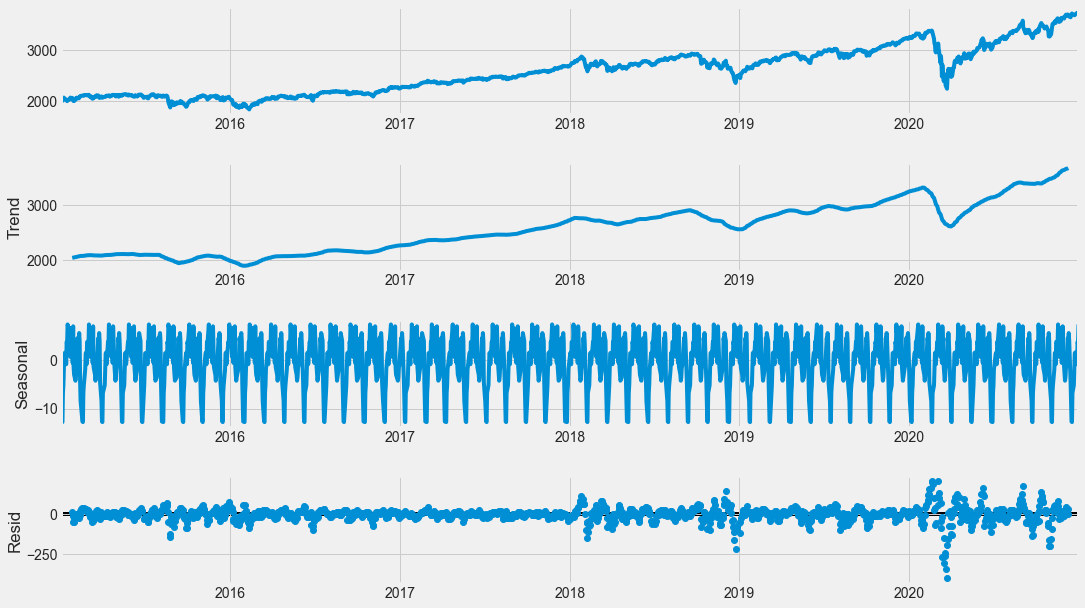

In [153]:
result = seasonal_decompose(index, model='additive', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

<Figure size 720x432 with 0 Axes>

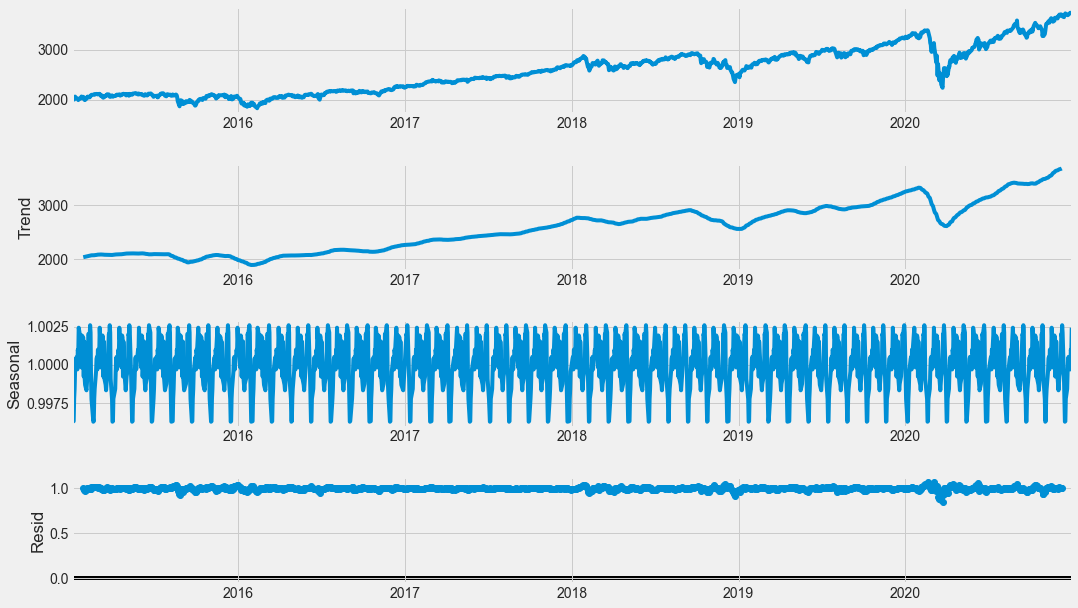

In [154]:
result = seasonal_decompose(index, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [155]:
# we take log of the series to reduce the magnitude of the values and reduce the rising trend in the series.

No handles with labels found to put in legend.


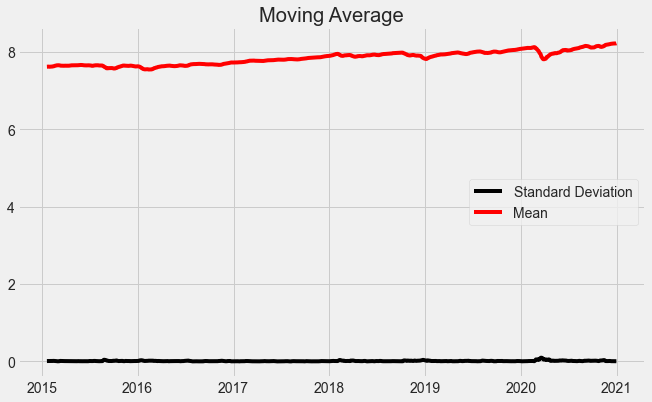

In [156]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(index)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show() 

In [157]:
# the both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

In [158]:
##applying the arima model

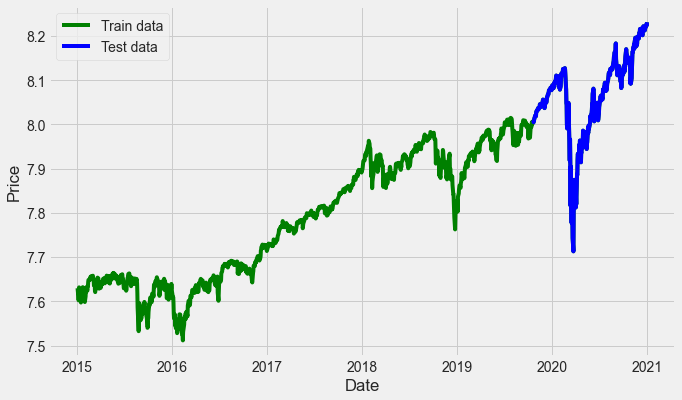

In [159]:
#split data into train and training set
train_data, test_data = df_log[ :int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [160]:
train_data

,Price
Date,
2015-01-02,7.629587
2015-01-05,7.611140
2015-01-06,7.602207
2015-01-07,7.613769
2015-01-08,7.631500
...,...
2019-10-14,7.995020
2019-10-15,8.004927
2019-10-16,8.002925


In [161]:
test_data

,Price
Date,
2019-10-21,8.008605
2019-10-22,8.005030
2019-10-23,8.007873
2019-10-24,8.009792
2019-10-25,8.013856
...,...
2020-12-24,8.216915
2020-12-28,8.225599
2020-12-29,8.223370


In [162]:
#Arima model

In [163]:
#pip install pmdarima

In [164]:
from pmdarima.arima import auto_arima

In [165]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',      
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8049.728, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8048.306, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8048.375, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8050.179, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8046.613, Time=1.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.142 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1208
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4026.090
Date:                Mon, 18 Jan 2021   AIC                          -8050.179
Time:                        22:43:29   BIC                          -8045.083
Sample:                             0   HQIC                         -8048.260
                               - 1208                                  

In [166]:
##Auto ARIMA: Automatically discover the optimal order for an ARIMA model.

In [167]:
#So the Auto ARIMA model provided the value of p,d, and q as 0,1 and 0 respectively.

# residual plots from auto ARIMA.

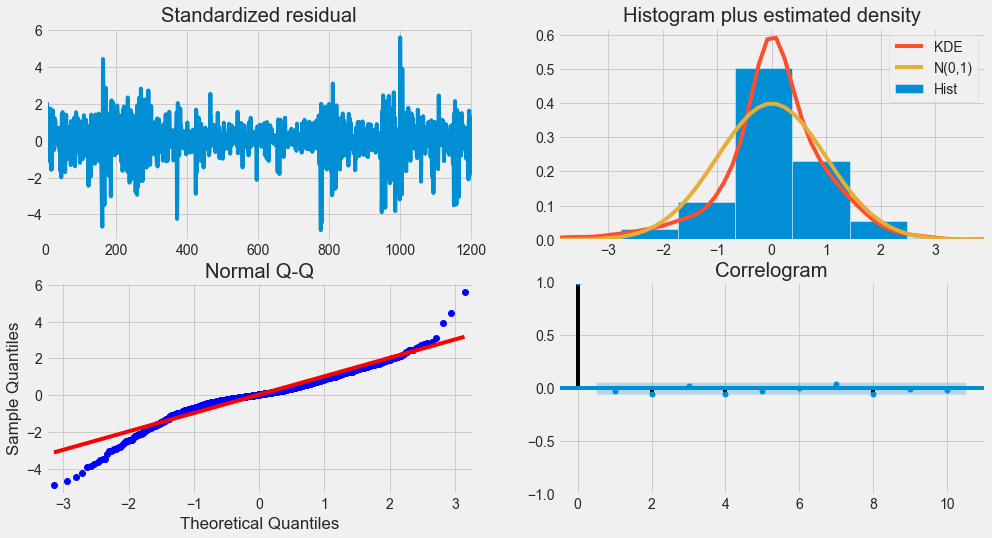

In [168]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [169]:
# The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

#The density plot suggest normal distribution with mean zero.

#

In [170]:
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 1207
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4026.864
Method:                           css   S.D. of innovations              0.009
Date:                Mon, 18 Jan 2021   AIC                          -8049.728
Time:                        22:43:31   BIC                          -8039.536
Sample:                             1   HQIC                         -8045.890
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.245      0.213      -0.000       0.001


In [171]:
test_data

,Price
Date,
2019-10-21,8.008605
2019-10-22,8.005030
2019-10-23,8.007873
2019-10-24,8.009792
2019-10-25,8.013856
...,...
2020-12-24,8.216915
2020-12-28,8.225599
2020-12-29,8.223370


In [172]:
## predicton for the test data

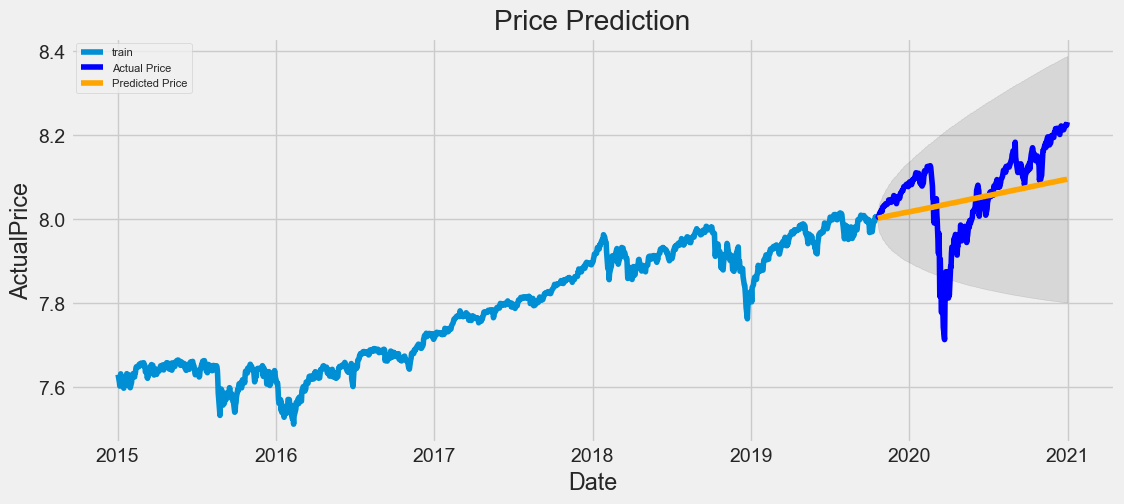

In [173]:
# Forecast
fc, se, conf = fitted.forecast(303, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='train')
plt.plot(test_data, color = 'blue', label='Actual Price')
plt.plot(fc_series, color = 'orange',label='Predicted Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Price Prediction')
plt.xlabel('Date')
plt.ylabel('ActualPrice')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [174]:
fc

array([8.0020653 , 8.00237364, 8.00268198, 8.00299033, 8.00329867,
       8.00360701, 8.00391535, 8.0042237 , 8.00453204, 8.00484038,
       8.00514872, 8.00545707, 8.00576541, 8.00607375, 8.0063821 ,
       8.00669044, 8.00699878, 8.00730712, 8.00761547, 8.00792381,
       8.00823215, 8.00854049, 8.00884884, 8.00915718, 8.00946552,
       8.00977387, 8.01008221, 8.01039055, 8.01069889, 8.01100724,
       8.01131558, 8.01162392, 8.01193226, 8.01224061, 8.01254895,
       8.01285729, 8.01316563, 8.01347398, 8.01378232, 8.01409066,
       8.01439901, 8.01470735, 8.01501569, 8.01532403, 8.01563238,
       8.01594072, 8.01624906, 8.0165574 , 8.01686575, 8.01717409,
       8.01748243, 8.01779078, 8.01809912, 8.01840746, 8.0187158 ,
       8.01902415, 8.01933249, 8.01964083, 8.01994917, 8.02025752,
       8.02056586, 8.0208742 , 8.02118254, 8.02149089, 8.02179923,
       8.02210757, 8.02241592, 8.02272426, 8.0230326 , 8.02334094,
       8.02364929, 8.02395763, 8.02426597, 8.02457431, 8.02488

In [175]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

MSE: 0.007400790006401694
MAE: 0.06900021934161035
RMSE: 0.08602784436681936


In [176]:
# from the arima model we got the RMSE value 0.086

<Figure size 1080x720 with 0 Axes>

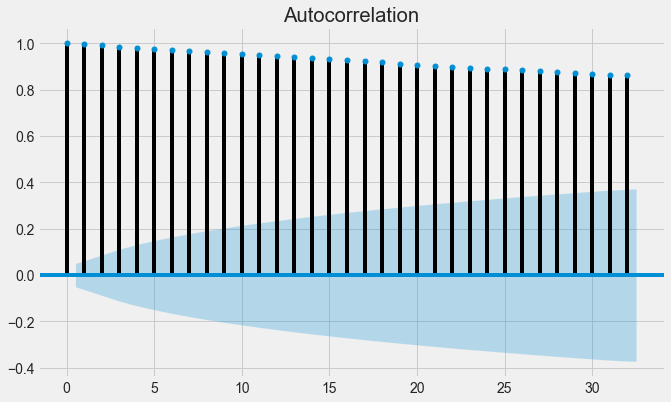

In [177]:
#Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=[15,10])
plot_acf(index)
plt.show()

<Figure size 1080x720 with 0 Axes>

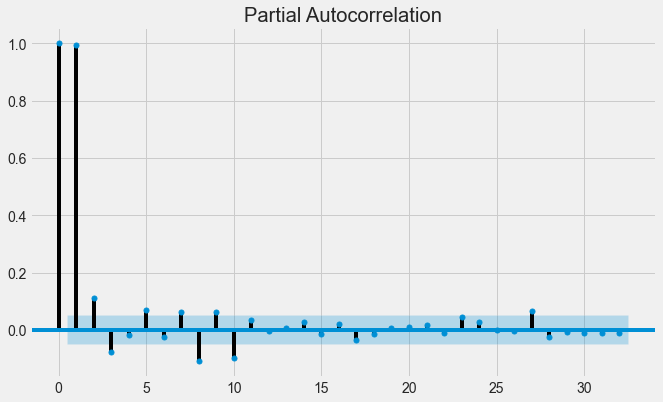

In [178]:
#plot Pacf
from statsmodels.graphics.tsaplots import plot_pacf
fig = plt.figure(figsize=[15,10])
plot_pacf(index)
plt.show()

In [179]:
## ACF AND PACF plots to show weather co relation is there or not